# Analysis

In [895]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

In [918]:
data = pd.read_csv('inspection_data_final.csv')

In [919]:
data = data.drop_duplicates()

In [920]:
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Score Average,Score StdDev,Grade A Count,Grade B Count,Grade C Count,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,16.888889,10.203485,4,0,0,0,0,0,3,2
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,18.166667,9.842702,4,0,0,0,0,0,5,3
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,5.000000,0.000000,1,0,0,0,0,0,1,1
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,8.333333,2.886751,1,0,0,0,0,0,2,2
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,13.888889,5.109903,3,0,0,0,0,0,4,3
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,4.5,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,8.666667,3.614784,4,0,0,0,0,0,2,2
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,4.0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,15.857143,5.669467,0,0,0,6,0,0,2,1
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,4.5,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,13.000000,4.647580,0,0,0,4,0,0,2,1
8,9292793488,Brooklyn,Japanese,11217,$11-30,4.5,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,45.000000,0.000000,0,0,0,3,0,0,1,1
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,4.0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,10.714286,1.603567,5,0,0,0,0,0,3,3


In [921]:
data.columns

Index([u'phone', u'area', u'category', u'postal_code', u'price_range',
       u'rating_value', u'restaurant', u'review_count', u'DBA', u'BORO',
       u'STREET', u'ZIPCODE', u'CUISINE DESCRIPTION', u'Score Count',
       u'Score Recent', u'Score Max', u'Score Min', u'Score Average',
       u'Score StdDev', u'Grade A Count', u'Grade B Count', u'Grade C Count',
       u'Not Yet Graded', u'P Count', u'Z Count', u'Inspection',
       u'Times_Graded'],
      dtype='object')

In [922]:
# making BORO dummy variables
data_boro = pd.get_dummies(data.BORO, prefix='BORO_')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, data_boro], axis=1)
data.head()

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded,BORO__BRONX,BORO__BROOKLYN,BORO__MANHATTAN,BORO__QUEENS,BORO__STATEN ISLAND
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,3,2,0,0,0,1,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,5,3,0,1,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,1,1,0,1,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,2,2,0,0,0,1,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,4,3,0,0,0,1,0


In [923]:
# create dummies for price range
price_dummies = pd.get_dummies(data.price_range, prefix='price_')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, price_dummies], axis=1)
data.head()

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Times_Graded,BORO__BRONX,BORO__BROOKLYN,BORO__MANHATTAN,BORO__QUEENS,BORO__STATEN ISLAND,price__$11-30,price__$31-60,price__Above $61,price__Under $10
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,2,0,0,0,1,0,1,0,0,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,3,0,1,0,0,0,1,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,1,0,1,0,0,0,1,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,2,0,0,0,1,0,0,1,0,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,3,0,0,0,1,0,1,0,0,0


In [924]:
# create dummies for cuisine
cuisine_dummies = pd.get_dummies(data['CUISINE DESCRIPTION'], prefix='cuisine')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, cuisine_dummies], axis=1)
data.head()

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Seafood,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,0,0,0,0,0,0,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,0,0,0,0,0,0,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,0,0,0,0,0,0,0


In [925]:
data.columns

Index([u'phone', u'area', u'category', u'postal_code', u'price_range',
       u'rating_value', u'restaurant', u'review_count', u'DBA', u'BORO',
       u'STREET', u'ZIPCODE', u'CUISINE DESCRIPTION', u'Score Count',
       u'Score Recent', u'Score Max', u'Score Min', u'Score Average',
       u'Score StdDev', u'Grade A Count', u'Grade B Count', u'Grade C Count',
       u'Not Yet Graded', u'P Count', u'Z Count', u'Inspection',
       u'Times_Graded', u'BORO__BRONX', u'BORO__BROOKLYN', u'BORO__MANHATTAN',
       u'BORO__QUEENS', u'BORO__STATEN ISLAND', u'price__$11-30',
       u'price__$31-60', u'price__Above $61', u'price__Under $10',
       u'cuisine_African', u'cuisine_American', u'cuisine_Asian',
       u'cuisine_Australian', u'cuisine_Bagels/Pretzels', u'cuisine_Bakery',
       u'cuisine_Barbecue', u'cuisine_Brazilian', u'cuisine_CafÃ©/Coffee/Tea',
       u'cuisine_Cajun', u'cuisine_Caribbean', u'cuisine_Chicken',
       u'cuisine_Chinese', u'cuisine_Chinese/Cuban', u'cuisine_Continent

In [926]:
data.dtypes

phone                                                                         int64
area                                                                         object
category                                                                     object
postal_code                                                                   int64
price_range                                                                  object
rating_value                                                                float64
restaurant                                                                   object
review_count                                                                  int64
DBA                                                                          object
BORO                                                                         object
STREET                                                                       object
ZIPCODE                                                                     

# Multinomial Regression

In [576]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [577]:
data.rating_value.unique()

array([ 4. ,  5. ,  4.5,  3.5,  3. ])

## -- Figuring out good features --

Parameters used:

- __C:__ no change in mean/stdev
- __solver:__ 'newton-cg' gave best result
- __multi_class:__ multinomial

In [578]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
feature = ['Inspection', 'review_count','cuisine_Japanese', 'Score Recent']
feature_set = data[feature]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)



In [582]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'fit_intercept':[True,False], 
                'class_weight': [None, 'balanced'],
                'multi_class': ['multinomial','ovr'],
                'solver':['newton-cg', 'sag', 'lbfgs']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.66438, std: 0.06578, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.66438, std: 0.06578, params: {'multi_class': 'multinomial', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.66438, std: 0.06578, params: {'multi_class': 'multinomial', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.65753, std: 0.06664, params: {'multi_class': 'ovr', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.65753, std: 0.06664, params: {'multi_class': 'ovr', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.65753, std: 0.06664, params: {'multi_class': 'ovr', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.53253, std: 0.04649, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': False, 'class_weight': None},
 mean: 0.53253, std: 0.04649, params: {'multi_class': 'multinomial', 'solver'

In [510]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [511]:
gs.best_score_

0.6643835616438356

In [512]:
zip(feature,gs.best_estimator_.coef_[0])

[('Inspection', -0.05665895203529453),
 ('review_count', 0.060381940322298662),
 ('cuisine_Japanese', -0.19961186481561477),
 ('Score Recent', 0.41383215167790049)]

In [513]:
zip(feature,np.exp(gs.best_estimator_.coef_[0]))

[('Inspection', 0.94491627619222163),
 ('review_count', 1.0622421821975503),
 ('cuisine_Japanese', 0.81904859296822163),
 ('Score Recent', 1.5126032176637851)]

In [293]:
scaled_feature

array([[ -6.35939069e-01,  -4.94439463e-01,  -2.08207585e-01,
         -7.99077543e-02],
       [ -1.08707533e-03,  -7.74670611e-02,  -2.08207585e-01,
         -3.35612568e-01],
       [ -1.27079106e+00,  -5.96827704e-01,  -2.08207585e-01,
         -8.47022196e-01],
       ..., 
       [  9.51190914e-01,   1.02083333e-01,  -2.08207585e-01,
         -2.07760161e-01],
       [  1.26861691e+00,   1.74793823e-01,  -2.08207585e-01,
         -3.35612568e-01],
       [  9.51190914e-01,  -2.80759656e-01,  -2.08207585e-01,
          1.75797059e-01]])

In [580]:
data.rating_value.dtype

dtype('float64')

In [927]:
data.rating_value = data.rating_value.astype('str')

In [928]:
data.rating_value.dtype

dtype('O')

In [236]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial',solver='newton-cg'),
    param_grid={'C': [i for i in range(1, 10)], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.65068, std: 0.07430, params: {'C': 1, 'class_weight': None},
 mean: 0.27911, std: 0.10085, params: {'C': 1, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 2, 'class_weight': None},
 mean: 0.27911, std: 0.09190, params: {'C': 2, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 3, 'class_weight': None},
 mean: 0.28082, std: 0.09063, params: {'C': 3, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 4, 'class_weight': None},
 mean: 0.27740, std: 0.08946, params: {'C': 4, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 5, 'class_weight': None},
 mean: 0.27568, std: 0.08798, params: {'C': 5, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 6, 'class_weight': None},
 mean: 0.27397, std: 0.08881, params: {'C': 6, 'class_weight': 'balanced'},
 mean: 0.64897, std: 0.07316, params: {'C': 7, 'class_weight': None},
 mean: 0.27397, std: 0.08881, params: {'C': 7, 'class_

In [247]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial',solver='newton-cg'),
    param_grid={'fit_intercept':[True,False], 'class_weight': [None, 'balanced']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.61301, std: 0.08316, params: {'fit_intercept': True, 'class_weight': None},
 mean: 0.57192, std: 0.06473, params: {'fit_intercept': False, 'class_weight': None},
 mean: 0.35788, std: 0.10038, params: {'fit_intercept': True, 'class_weight': 'balanced'},
 mean: 0.26370, std: 0.09887, params: {'fit_intercept': False, 'class_weight': 'balanced'}]

In [72]:
gs.best_estimator_.coef_

array([[ 0.1723381 ,  0.01962487, -0.50805434, -0.35573095, -0.16085733],
       [ 0.3419758 ,  0.38043114,  0.08805815,  0.15525198,  0.25290218],
       [-0.0831393 ,  0.98758609,  0.44167099,  0.47818338,  0.02530415],
       [-0.20001238,  0.00251231,  0.18124987,  0.29258322,  0.17579428],
       [-0.23116222, -1.39015442, -0.20292468, -0.57028763, -0.29314329]])

In [73]:
features = ['Inspection', 'review_count', 'Grade A Count', 'Grade B Count', 'cuisine_Thai']


In [305]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [306]:
gs.best_score_

0.6421232876712328

In [91]:
gs.best_estimator_.coef_

array([[ 0.1723381 ,  0.01962487, -0.50805434, -0.35573095, -0.16085733],
       [ 0.3419758 ,  0.38043114,  0.08805815,  0.15525198,  0.25290218],
       [-0.0831393 ,  0.98758609,  0.44167099,  0.47818338,  0.02530415],
       [-0.20001238,  0.00251231,  0.18124987,  0.29258322,  0.17579428],
       [-0.23116222, -1.39015442, -0.20292468, -0.57028763, -0.29314329]])

## -- Testing all features together --

In [101]:
data['cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)'].unique()

array([0, 1])

In [116]:
data['cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)'] = data['cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)'].astype(float)

In [109]:
data['cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)'].dtype

dtype('float64')

In [115]:
data['cuisine_Japanese'].dtype

dtype('uint8')

In [215]:
feature_set = data[['review_count','Score Count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'P Count', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60',
                    'price__Under $10', 'cuisine_Japanese',
                    'cuisine_Mediterranean', 'cuisine_Seafood','cuisine_Thai']]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)


In [268]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'fit_intercept':[True,False], 
                'class_weight': [None, 'balanced'],
                'multi_class': ['multinomial','ovr'],
                'solver':['newton-cg', 'sag', 'lbfgs']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.63014, std: 0.09938, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.63014, std: 0.09938, params: {'multi_class': 'multinomial', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.63014, std: 0.09938, params: {'multi_class': 'multinomial', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.63014, std: 0.09938, params: {'multi_class': 'ovr', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.63014, std: 0.09938, params: {'multi_class': 'ovr', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.63014, std: 0.09938, params: {'multi_class': 'ovr', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.33733, std: 0.07689, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': False, 'class_weight': None},
 mean: 0.33733, std: 0.07689, params: {'multi_class': 'multinomial', 'solver'

In [269]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [270]:
gs.best_score_

0.6301369863013698

In [173]:
gs.best_estimator_.coef_

array([[ -9.24100132e-02,   8.21126363e-04,   1.32533428e-01,
          3.68805021e-01,   7.04582830e-01,   3.21599488e-02,
          2.07666062e-01,  -4.48783605e-02,  -3.85943686e-01,
         -2.38967552e-01,   1.16324853e-01,  -6.24815996e-02,
          2.61687401e-01,  -1.42631059e-01,   2.69185845e-01,
          7.72975941e-02,  -6.00529307e-01,   8.08073201e-01,
          4.29737477e-01,  -1.49924087e-01,  -4.24803865e-01,
         -2.71541691e-01,  -1.47957099e-02,   5.44274899e-01,
         -6.98370042e-02,  -3.58269897e-03,  -1.63526184e-03,
         -1.07159292e-01,  -6.93238085e-02,  -1.92517360e-01,
         -4.86053493e-02,  -2.74850877e-02,  -3.21190809e-02,
         -9.06162948e-02,   5.48399332e-01,  -2.51936233e-03,
         -9.25429597e-03,  -2.16974000e-02,  -5.49645108e-02,
         -1.88324844e-02,  -5.03769488e-02,  -9.31461810e-02,
         -1.98709352e-02,  -4.57553448e-02,  -9.84573896e-04,
         -4.51537562e-01,  -3.29099659e-01,  -1.06284853e-02,
        

In [205]:
features = ['review_count','Score Count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'P Count', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10', 'cuisine_American',
                    'cuisine_Asian', 'cuisine_Caribbean',
                    'cuisine_Chinese', 'cuisine_French', 'cuisine_Greek', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Korean','cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Pizza', 'cuisine_Seafood',
                    'cuisine_Spanish','cuisine_Thai',
                    'cuisine_Vietnamese/Cambodian/Malaysia']

In [206]:
result = pd.DataFrame(zip(features,gs.best_estimator_.coef_[0]))
result

,0,1
0,review_count,0.490675
1,Score Count,0.128144
2,Score Recent,0.362419
3,Score Max,0.519141
4,Score Min,0.835832
5,Score Average,0.701331
6,Score StdDev,0.778560
7,Grade A Count,0.221195
8,Grade B Count,0.195267
9,Grade C Count,0.774996


In [178]:
result['odds'] = np.exp(gs.best_estimator_.coef_[0])
result

,0,1,odds
0,review_count,-0.092410,0.911731
1,Score Count,0.000821,1.000821
2,Score Recent,0.132533,1.141717
3,Score Max,0.368805,1.446006
4,Score Min,0.704583,2.023003
5,Score Average,0.032160,1.032683
6,Score StdDev,0.207666,1.230802
7,Grade A Count,-0.044878,0.956114
8,Grade B Count,-0.385944,0.679809
9,Grade C Count,-0.238968,0.787440


In [183]:
result.sort(columns = 'odds', ascending = False)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1,odds
17,BORO__QUEENS,0.808073,2.243581
65,cuisine_Seafood,0.707664,2.029245
4,Score Min,0.704583,2.023003
34,cuisine_Chinese,0.548399,1.730481
23,cuisine_American,0.544275,1.723358
18,price__$11-30,0.429737,1.536854
3,Score Max,0.368805,1.446006
14,Times_Graded,0.269186,1.308898
12,Z Count,0.261687,1.299120
6,Score StdDev,0.207666,1.230802


In [185]:
head = result.sort(columns = 'odds', ascending = False).head(10)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [193]:
head


,0,1,odds
17,BORO__QUEENS,0.808073,2.243581
65,cuisine_Seafood,0.707664,2.029245
4,Score Min,0.704583,2.023003
34,cuisine_Chinese,0.548399,1.730481
23,cuisine_American,0.544275,1.723358
18,price__$11-30,0.429737,1.536854
3,Score Max,0.368805,1.446006
14,Times_Graded,0.269186,1.308898
12,Z Count,0.261687,1.299120
6,Score StdDev,0.207666,1.230802


In [197]:
feature = ['Score Min','Score Max',
                    'Z Count', 'BORO__QUEENS','price__$11-30',
                    'cuisine_American','cuisine_Chinese', 'Score StdDev', 
                    'Times_Graded','cuisine_Seafood']
feature_set = data[feature]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)


In [198]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'fit_intercept':[True,False], 
                'class_weight': [None, 'balanced'],
                'multi_class': ['multinomial','ovr'],
                'solver':['newton-cg', 'sag', 'lbfgs']},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.62500, std: 0.07814, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.62500, std: 0.07814, params: {'multi_class': 'multinomial', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.62500, std: 0.07814, params: {'multi_class': 'multinomial', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.62158, std: 0.07916, params: {'multi_class': 'ovr', 'solver': 'newton-cg', 'fit_intercept': True, 'class_weight': None},
 mean: 0.62158, std: 0.07916, params: {'multi_class': 'ovr', 'solver': 'sag', 'fit_intercept': True, 'class_weight': None},
 mean: 0.62158, std: 0.07916, params: {'multi_class': 'ovr', 'solver': 'lbfgs', 'fit_intercept': True, 'class_weight': None},
 mean: 0.53938, std: 0.03519, params: {'multi_class': 'multinomial', 'solver': 'newton-cg', 'fit_intercept': False, 'class_weight': None},
 mean: 0.53938, std: 0.03519, params: {'multi_class': 'multinomial', 'solver'

In [199]:
gs.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
gs.best_score_

0.625

In [202]:
gs.best_estimator_.coef_

array([[ 0.49067488,  0.12814351,  0.36241918,  0.51914136,  0.8358315 ,
         0.70133104,  0.77856031,  0.22119482,  0.19526745,  0.77499618],
       [-0.15008273,  0.01327398, -0.32025385, -0.33615812, -0.20248502,
         0.24648814,  0.06420588,  0.25028344,  0.1579488 , -0.28950363],
       [-0.12883141,  0.09734758,  0.0839007 , -0.35093549,  0.09011386,
        -0.20607442, -0.08931443, -0.12294502,  0.46404431, -0.03430622],
       [-0.20454875, -0.13882116,  0.01092895, -0.01045604, -0.05972866,
        -0.39581212, -0.2201582 ,  0.05315607, -0.18318395, -0.08564329],
       [-0.007212  , -0.09994391, -0.13699497,  0.1784083 , -0.66373168,
        -0.34593264, -0.53329356, -0.40168931, -0.63407661, -0.36554304]])

In [204]:
np.exp(gs.best_estimator_.coef_[0])

array([ 1.63341822,  1.13671613,  1.43680109,  1.68058401,  2.30673131,
        2.01643487,  2.17833387,  1.24756646,  1.21563607,  2.17058383])

In [158]:
feature = ['Score Min','Grade B Count',
                    'BORO__MANHATTAN', 'BORO__QUEENS','price__Above $61',
                    'cuisine_American','cuisine_Chinese', 'cuisine_Hawaiian', 
                    'cuisine_Japanese','cuisine_Seafood']
zip(feature,gs.best_estimator_.coef_[0])

[('Score Min', 0.75553549087798755),
 ('Grade B Count', -0.56109856445311024),
 ('BORO__MANHATTAN', -0.91870111605993043),
 ('BORO__QUEENS', 0.50506106556376018),
 ('price__Above $61', -0.32346586064639182),
 ('cuisine_American', 0.74413138394285505),
 ('cuisine_Chinese', 0.85880623285675672),
 ('cuisine_Hawaiian', -0.25222934177486422),
 ('cuisine_Japanese', -0.21050435863557884),
 ('cuisine_Seafood', 0.78665946948481269)]

In [160]:
feature_set = data[['phone', 'area', 'category', 'postal_code', 'price_range',
                    'restaurant', 'review_count', 'DBA', 'BORO',
                    'STREET', 'ZIPCODE', 'CUISINE DESCRIPTION', 'Score Count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'P Count', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10', 'cuisine_African', 'cuisine_American',
                    'cuisine_Asian', 'cuisine_Australian', 'cuisine_Bagels/Pretzels',
                    'cuisine_Bakery', 'cuisine_Barbecue', 'cuisine_Brazilian',
                    'cuisine_CafÃ©/Coffee/Tea', 'cuisine_Cajun', 'cuisine_Caribbean',
                    'cuisine_Chicken', 'cuisine_Chinese', 'cuisine_Chinese/Cuban',
                    'cuisine_Continental', 'cuisine_Czech', 'cuisine_Delicatessen',
                    'cuisine_Eastern European', 'cuisine_Filipino', 'cuisine_French',
                    'cuisine_German', 'cuisine_Greek', 'cuisine_Hamburgers',
                    'cuisine_Hawaiian', 'cuisine_Indian', 'cuisine_Indonesian',
                    'cuisine_Irish', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Jewish/Kosher', 'cuisine_Juice, Smoothies, Fruit Salads',
                    'cuisine_Korean','cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Other', 'cuisine_Peruvian', 'cuisine_Pizza',
                    'cuisine_Pizza/Italian', 'cuisine_Polish', 'cuisine_Sandwiches',
                    'cuisine_Sandwiches/Salads/Mixed Buffet', 'cuisine_Seafood',
                    'cuisine_Soul Food', 'cuisine_Spanish', 'cuisine_Steak',
                    'cuisine_Tapas', 'cuisine_Tex-Mex', 'cuisine_Thai',
                    'cuisine_Turkish', 'cuisine_Vegetarian',
                    'cuisine_Vietnamese/Cambodian/Malaysia']]



# Random Forest

In [515]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestClassifier(n_estimators = 20)
    

In [522]:
features = ['review_count','Score Count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'P Count', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10', 'cuisine_American',
                    'cuisine_Asian', 'cuisine_Caribbean',
                    'cuisine_Chinese', 'cuisine_French', 'cuisine_Greek', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Korean','cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Pizza', 'cuisine_Seafood',
                    'cuisine_Spanish','cuisine_Thai',
                    'cuisine_Vietnamese/Cambodian/Malaysia']

In [543]:
features = ['Inspection', 'review_count','Score Recent','cuisine_American']

In [544]:
X = data[features]
y = data.rating_value

In [545]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [546]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,review_count,0.563721
2,Score Recent,0.224195
0,Inspection,0.160117
3,cuisine_American,0.051967



# Making Rating Binary
         

In [554]:
data


,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Score Average,Score StdDev,Grade A Count,Grade B Count,Grade C Count,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,16.888889,10.203485,4,0,0,0,0,0,3,2
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,18.166667,9.842702,4,0,0,0,0,0,5,3
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,5.000000,0.000000,1,0,0,0,0,0,1,1
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,8.333333,2.886751,1,0,0,0,0,0,2,2
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,13.888889,5.109903,3,0,0,0,0,0,4,3
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,4.5,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,8.666667,3.614784,4,0,0,0,0,0,2,2
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,4.0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,15.857143,5.669467,0,0,0,6,0,0,2,1
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,4.5,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,13.000000,4.647580,0,0,0,4,0,0,2,1
8,9292793488,Brooklyn,Japanese,11217,$11-30,4.5,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,45.000000,0.000000,0,0,0,3,0,0,1,1
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,4.0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,10.714286,1.603567,5,0,0,0,0,0,3,3


In [558]:
data2 = data
data2

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Score Average,Score StdDev,Grade A Count,Grade B Count,Grade C Count,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,16.888889,10.203485,4,0,0,0,0,0,3,2
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,18.166667,9.842702,4,0,0,0,0,0,5,3
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,5.000000,0.000000,1,0,0,0,0,0,1,1
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,8.333333,2.886751,1,0,0,0,0,0,2,2
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,13.888889,5.109903,3,0,0,0,0,0,4,3
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,4.5,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,8.666667,3.614784,4,0,0,0,0,0,2,2
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,4.0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,15.857143,5.669467,0,0,0,6,0,0,2,1
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,4.5,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,13.000000,4.647580,0,0,0,4,0,0,2,1
8,9292793488,Brooklyn,Japanese,11217,$11-30,4.5,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,45.000000,0.000000,0,0,0,3,0,0,1,1
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,4.0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,10.714286,1.603567,5,0,0,0,0,0,3,3


In [929]:
data.rating_value = data.rating_value.replace('4.5',1)
data.rating_value = data.rating_value.replace('5.0',1)
data.rating_value = data.rating_value.replace('4.0',0)
data.rating_value = data.rating_value.replace('3.5',0)
data.rating_value = data.rating_value.replace('3.0',0)

In [930]:
data.rating_value.unique()

array([0, 1])

In [722]:
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Seafood,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,0,0,0,0,0,0,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,1,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,1,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,0,0,0,0,0,0,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,1,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,0,0,0,0,0,0,0
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,1,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,1,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,1,0,0,0,0,0,0,0,0,0
8,9292793488,Brooklyn,Japanese,11217,$11-30,1,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0


In [931]:
data.columns

Index([u'phone', u'area', u'category', u'postal_code', u'price_range',
       u'rating_value', u'restaurant', u'review_count', u'DBA', u'BORO',
       u'STREET', u'ZIPCODE', u'CUISINE DESCRIPTION', u'Score Count',
       u'Score Recent', u'Score Max', u'Score Min', u'Score Average',
       u'Score StdDev', u'Grade A Count', u'Grade B Count', u'Grade C Count',
       u'Not Yet Graded', u'P Count', u'Z Count', u'Inspection',
       u'Times_Graded', u'BORO__BRONX', u'BORO__BROOKLYN', u'BORO__MANHATTAN',
       u'BORO__QUEENS', u'BORO__STATEN ISLAND', u'price__$11-30',
       u'price__$31-60', u'price__Above $61', u'price__Under $10',
       u'cuisine_African', u'cuisine_American', u'cuisine_Asian',
       u'cuisine_Australian', u'cuisine_Bagels/Pretzels', u'cuisine_Bakery',
       u'cuisine_Barbecue', u'cuisine_Brazilian', u'cuisine_CafÃ©/Coffee/Tea',
       u'cuisine_Cajun', u'cuisine_Caribbean', u'cuisine_Chicken',
       u'cuisine_Chinese', u'cuisine_Chinese/Cuban', u'cuisine_Continent

# Logistic Regression

In [932]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [933]:
features = ['review_count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'P Count', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10', 'cuisine_American',
                    'cuisine_Asian', 'cuisine_Caribbean',
                    'cuisine_Chinese', 'cuisine_French', 'cuisine_Greek', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Korean','cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Pizza', 'cuisine_Seafood',
                    'cuisine_Spanish','cuisine_Thai',
                    'cuisine_Vietnamese/Cambodian/Malaysia']

In [934]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
#features = ['price__Under $10', 'BORO__QUEENS','cuisine_Thai', 'Score Recent']
feature_set = data[features]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)



In [935]:
scaled_feature

array([[-0.49440639, -0.08210349,  0.25587467, ..., -0.14717557,
        -0.17596986, -0.11973687],
       [-0.07488752, -0.33604105,  0.45758089, ..., -0.14717557,
        -0.17596986, -0.11973687],
       [-0.59741992, -0.84391618, -1.22330427, ..., -0.14717557,
        -0.17596986, -0.11973687],
       ..., 
       [ 0.1057594 , -0.20907227, -0.41647939, ..., -0.14717557,
        -0.17596986, -0.11973687],
       [ 0.17891393, -0.33604105,  0.12140386, ..., -0.14717557,
        -0.17596986, -0.11973687],
       [-0.27942163,  0.17183408,  0.5248163 , ..., -0.14717557,
        -0.17596986, -0.11973687]])

In [936]:
df_scaled = pd.DataFrame(scaled_feature)

In [937]:
df_scaled.columns = features
df_scaled

,review_count,Score Recent,Score Max,Score Min,Score Average,Score StdDev,Grade A Count,Grade B Count,Grade C Count,Not Yet Graded,...,cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Pizza,cuisine_Seafood,cuisine_Spanish,cuisine_Thai,cuisine_Vietnamese/Cambodian/Malaysia
0,-0.494406,-0.082103,0.255875,-1.134550,0.105479,0.654772,-0.443358,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
1,-0.074888,-0.336041,0.457581,-0.814592,0.240929,0.595512,-0.443358,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
2,-0.597420,-0.843916,-1.223304,-0.334655,-1.154796,-1.021193,-1.321798,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
3,-0.497392,-0.843916,-0.887127,-0.334655,-0.801448,-0.547032,-1.321798,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
4,-0.331675,0.044865,-0.214773,-0.334655,-0.212535,-0.181870,-0.736172,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
5,-0.607871,-0.082103,-0.819892,-0.494634,-0.766113,-0.427449,-0.443358,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
6,-0.448125,0.806678,-0.349244,-0.654613,-0.003891,-0.089959,-1.614611,-0.427790,-0.202450,6.939668,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
7,-0.533223,0.552740,-0.483715,-0.014698,-0.306761,-0.257808,-1.614611,-0.427790,-0.202450,4.557708,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,6.522152,-0.147176,-0.175970,-0.119737
8,-0.625786,4.234835,1.466112,6.064498,3.085380,-1.021193,-1.614611,-0.427790,-0.202450,3.366728,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737
9,-0.392886,0.044865,-0.752656,0.305260,-0.549056,-0.757800,-0.150545,-0.427790,-0.202450,-0.206212,...,-0.170561,-0.19139,-0.186373,-0.181237,-0.10351,-0.119737,-0.153324,-0.147176,-0.175970,-0.119737


In [938]:
gs = grid_search.GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={'fit_intercept':[True,False], 
                'class_weight': [None, 'balanced'],
                'penalty': ['l1', 'l2'],
                'C': [i for i in range(1, 10)]},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.69788, std: 0.06893, params: {'penalty': 'l1', 'C': 1, 'fit_intercept': True, 'class_weight': None},
 mean: 0.70318, std: 0.05963, params: {'penalty': 'l2', 'C': 1, 'fit_intercept': True, 'class_weight': None},
 mean: 0.64664, std: 0.02698, params: {'penalty': 'l1', 'C': 1, 'fit_intercept': False, 'class_weight': None},
 mean: 0.64134, std: 0.03162, params: {'penalty': 'l2', 'C': 1, 'fit_intercept': False, 'class_weight': None},
 mean: 0.66961, std: 0.04926, params: {'penalty': 'l1', 'C': 1, 'fit_intercept': True, 'class_weight': 'balanced'},
 mean: 0.66078, std: 0.04263, params: {'penalty': 'l2', 'C': 1, 'fit_intercept': True, 'class_weight': 'balanced'},
 mean: 0.63781, std: 0.03746, params: {'penalty': 'l1', 'C': 1, 'fit_intercept': False, 'class_weight': 'balanced'},
 mean: 0.64311, std: 0.03268, params: {'penalty': 'l2', 'C': 1, 'fit_intercept': False, 'class_weight': 'balanced'},
 mean: 0.69965, std: 0.06355, params: {'penalty': 'l1', 'C': 2, 'fit_intercept': True, 'clas

In [939]:
gs.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [940]:
gs.best_score_

0.7031802120141343

In [942]:
non_abs = pd.DataFrame(zip(features,gs.best_estimator_.coef_[0]))
non_abs.columns = ['Features', 'coef']
non_abs

,Features,coef
0,review_count,-1.010319
1,Score Recent,-0.243453
2,Score Max,0.374366
3,Score Min,0.271286
4,Score Average,-0.481807
5,Score StdDev,-0.085325
6,Grade A Count,-0.413890
7,Grade B Count,-0.233923
8,Grade C Count,-0.146334
9,Not Yet Graded,-0.214285


In [943]:
result2 = pd.DataFrame(zip(features,np.abs(gs.best_estimator_.coef_[0])))
result2.columns = ['Features','abs_coef']
result2

,Features,abs_coef
0,review_count,1.010319
1,Score Recent,0.243453
2,Score Max,0.374366
3,Score Min,0.271286
4,Score Average,0.481807
5,Score StdDev,0.085325
6,Grade A Count,0.413890
7,Grade B Count,0.233923
8,Grade C Count,0.146334
9,Not Yet Graded,0.214285


In [944]:
exp = pd.DataFrame(zip(features,np.exp(gs.best_estimator_.coef_[0])))
exp.columns = ['Features','exp(coef)']
exp

,Features,exp(coef)
0,review_count,0.364103
1,Score Recent,0.783916
2,Score Max,1.454069
3,Score Min,1.311650
4,Score Average,0.617666
5,Score StdDev,0.918214
6,Grade A Count,0.661074
7,Grade B Count,0.791423
8,Grade C Count,0.863869
9,Not Yet Graded,0.807119


In [945]:
result2 = result2.merge(non_abs)
# result2.sort(columns = 'abs_coef', ascending = False)
result2

,Features,abs_coef,coef
0,review_count,1.010319,-1.010319
1,Score Recent,0.243453,-0.243453
2,Score Max,0.374366,0.374366
3,Score Min,0.271286,0.271286
4,Score Average,0.481807,-0.481807
5,Score StdDev,0.085325,-0.085325
6,Grade A Count,0.413890,-0.413890
7,Grade B Count,0.233923,-0.233923
8,Grade C Count,0.146334,-0.146334
9,Not Yet Graded,0.214285,-0.214285


In [946]:
result2 = result2.merge(exp)
result2

,Features,abs_coef,coef,exp(coef)
0,review_count,1.010319,-1.010319,0.364103
1,Score Recent,0.243453,-0.243453,0.783916
2,Score Max,0.374366,0.374366,1.454069
3,Score Min,0.271286,0.271286,1.311650
4,Score Average,0.481807,-0.481807,0.617666
5,Score StdDev,0.085325,-0.085325,0.918214
6,Grade A Count,0.413890,-0.413890,0.661074
7,Grade B Count,0.233923,-0.233923,0.791423
8,Grade C Count,0.146334,-0.146334,0.863869
9,Not Yet Graded,0.214285,-0.214285,0.807119


In [947]:
result2.to_csv('coefficientsbinary.csv',encoding = 'utf-8')

In [948]:
# getting prediction probability and making it a dataframe
predict = pd.DataFrame(gs.best_estimator_.predict_proba(scaled_feature)[:,1])
predict.columns = ['P(predict)']
predict

,P(predict)
0,0.278071
1,0.079083
2,0.521283
3,0.771560
4,0.704070
5,0.533640
6,0.189273
7,0.310418
8,0.237213
9,0.324537


In [949]:
len(gs.best_estimator_.predict_proba(scaled_feature)[:,1])

566

In [950]:
data.tail()

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Seafood,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
579,2122213800,New York,"Italian,\n Caterers,\n ...",10036,$11-30,0,Carmine’s Italian Restaurant - Time Square,2389,CARMINE'S,MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
580,2122211822,New York,"Sports Bars,\n Pubs,\n ...",10018,$11-30,0,District Tap House,522,DISTRICT TAP HOUSE,MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
581,2122194080,New York,"Pizza,\n Italian",10013,$11-30,0,Piacere,508,PIACERE,MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
582,2122190019,New York,Italian,10013,$11-30,0,Pepe Rosso Social,557,PEPE ROSSO SOCIAL,MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
583,2122078349,New York,"Spanish,\n Tapas/Small Plates",10065,$11-30,0,El Porron,250,EL PORRON,MANHATTAN,...,0,0,0,0,0,0,0,0,0,0


In [951]:
data['P(predict)'] = gs.best_estimator_.predict_proba(scaled_feature)[:,1]
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia,P(predict)
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,0,0,0,0,0,0,0.278071
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.079083
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,1,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.521283
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,1,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,0,0,0,0,0,0,0.771560
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,1,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,0,0,0,0,0,0,0.704070
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,1,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.533640
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.189273
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,1,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.310418
8,9292793488,Brooklyn,Japanese,11217,$11-30,1,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.237213
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0.324537


In [952]:
data.to_csv('final_data_with_prediction.csv', encoding = 'utf-8')

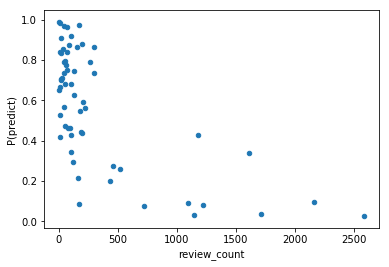

In [953]:
data[data['price__Under $10']==1].plot(x='review_count',y='P(predict)',kind='scatter')

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


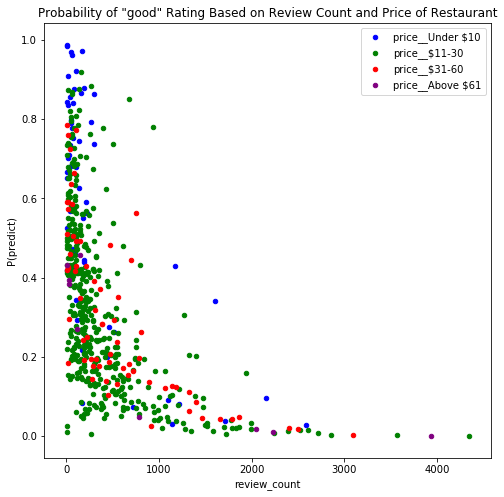

In [967]:
ax = plt.subplot(111)
price_features = ["price__Under $10","price__$11-30","price__$31-60","price__Above $61"]
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    data.drop(516)[data[price_features[e]] == 1].plot(x='review_count', y='P(predict)', kind='scatter', color = c, ax=ax, figsize = (8,8))
ax.set(title='Probability of "good" Rating Based on Review Count and Price of Restaurant')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines[:2], labels=price_features, loc='best')  # legend for first two lines only

In [955]:
data.sort(columns = 'review_count',ascending = False).head(20)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia,P(predict)
516,2123880088,New York,Ramen,10003,$11-30,0,Ippudo East Village,8594,IPPUDO,MANHATTAN,...,0,0,0,0,0,0,0,0,0,5.745129e-07
564,2122338888,New York,"Shanghainese,\n Desserts,\n...",10013,$11-30,0,Joe’s Shanghai,4343,JOE'S SHANGHAI RESTAURANT,MANHATTAN,...,0,0,0,0,0,0,0,0,0,5.045435e-05
215,7183877400,Brooklyn,"Steakhouses,\n Desserts,\n ...",11211,Above $61,0,Peter Luger,3938,PETER LUGER STEAKHOUSE,BROOKLYN,...,0,0,1,0,0,0,0,0,0,6.826557e-04
294,6466026263,New York,"Breakfast & Brunch,\n Ameri...",10002,$11-30,0,Clinton Street Baking Company,3569,CLINTON STREET BAKING COMPANY,MANHATTAN,...,0,0,0,0,0,0,0,0,0,1.632153e-03
375,2129896699,New York,"Chinese,\n Asian Fusion",10011,$31-60,0,Buddakan,3090,BUDDAKAN,MANHATTAN,...,0,0,0,0,0,0,0,0,0,2.333732e-03
463,2126252001,New York,"Cuban,\n Mexican",10012,$11-30,0,Cafe Habana,2852,CAFE HABANA/CAFE HABANA TO GO,MANHATTAN,...,0,0,0,0,0,0,0,0,0,3.649864e-03
534,2123022000,New York,"Diners,\n American (Traditi...",10036,$11-30,0,Junior’s Restaurant & Cheesecake,2714,JUNIOR'S RESTAURANT,MANHATTAN,...,0,0,0,0,0,0,0,0,0,6.259353e-03
551,2122547000,New York,"American (Traditional),\n M...",10012,$11-30,0,Jane,2604,JANE,MANHATTAN,...,0,0,0,0,0,0,0,0,0,1.631974e-02
180,7184491230,Brooklyn,"Pizza,\n Italian",11223,Under $10,0,L & B Spumoni Gardens,2583,LB SPUMONI GARDENS,BROOKLYN,...,0,0,0,0,0,0,0,0,0,2.656351e-02
380,2129742500,New York,Ramen,10019,$11-30,0,Ippudo Westside,2522,IPPUDO NY,MANHATTAN,...,0,0,0,0,0,0,0,0,0,1.434631e-02


# Random Forest

In [732]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestClassifier(n_estimators = 20)


In [734]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [659]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
0,review_count,0.173448
5,Score Average,0.086542
1,Score Count,0.081795
6,Score StdDev,0.073984
3,Score Max,0.067570
2,Score Recent,0.066224
4,Score Min,0.060937
13,Inspection,0.051739
7,Grade A Count,0.042998
14,Times_Graded,0.041194


In [660]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [ 0.72551092  0.68087855  0.63500237], Average AUC 0.68046394786
n trees: 1, CV AUC [ 0.55232558  0.59496124  0.59102746], Average AUC 0.579438094609
n trees: 11, CV AUC [ 0.67212826  0.6678412   0.67323627], Average AUC 0.671068577001
n trees: 21, CV AUC [ 0.72292694  0.65568475  0.6323982 ], Average AUC 0.670336633046
n trees: 31, CV AUC [ 0.76832276  0.73473103  0.67655066], Average AUC 0.726534818877
n trees: 41, CV AUC [ 0.73725628  0.69244773  0.6953125 ], Average AUC 0.708338838971
n trees: 51, CV AUC [ 0.75487432  0.69879023  0.69164299], Average AUC 0.715102514975
n trees: 61, CV AUC [ 0.72815363  0.72116514  0.66749527], Average AUC 0.705604678079
n trees: 71, CV AUC [ 0.75381724  0.72921071  0.67240767], Average AUC 0.718478541471
n trees: 81, CV AUC [ 0.73643411  0.71711299  0.68039773], Average AUC 0.711314942056
n trees: 91, CV AUC [ 0.73831337  0.72680291  0.69247159], Average AUC 0.71919595666


In [820]:
## 1. Building a model with more relevant features

model = RandomForestClassifier(n_estimators=50)

## 2a. Evaluate predictive performance for the given feature set
scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV AUC {}, Accuracy {}'.format(scores, scores.mean()))

scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV AUC {}, Accuracy {}'.format(scores, scores.mean()))

# Fit a model on the whole dataset
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

CV AUC [ 0.63076923  0.67692308  0.64948454], Accuracy 0.652392281258
CV AUC [ 0.64102564  0.68717949  0.63917526], Accuracy 0.655793461979


,Features,Importance Score
3,review_count,0.394289
4,Score Average,0.259196
1,Score Max,0.189570
2,Inspection,0.123398
0,price__Under $10,0.033547


In [738]:
features_df.to_csv('randomforestallbinary.csv',encoding = 'utf-8')

In [795]:
features = ['review_count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10','cuisine_Caribbean',
                    'cuisine_Chinese', 'cuisine_French', 'cuisine_Greek', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Korean',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Pizza', 'cuisine_Seafood',
                    'cuisine_Spanish','cuisine_Thai',
                    'cuisine_Vietnamese/Cambodian/Malaysia']

In [676]:
features = ['Score Min','Score Max',
                    'Z Count', 'BORO__QUEENS','price__$11-30',
                    'cuisine_American','cuisine_Chinese', 'Score StdDev', 
                    'Times_Graded','cuisine_Seafood']

In [773]:
X = df_scaled
y = data.rating_value

In [767]:
features = ['price__Under $10', 'Score Max','Inspection','review_count','Score Average']


In [768]:
from sklearn import grid_search, cross_validation
from sklearn.preprocessing import StandardScaler
feature_set = data[features]
sc = StandardScaler()
scaled_feature = sc.fit_transform(feature_set)


In [ ]:
model = RandomForestClassifier(n_estimators = 20)

In [805]:
gs = grid_search.GridSearchCV(
    estimator= RandomForestClassifier(),
    param_grid={'n_estimators':[10,50,100,200],
                'class_weight':['balanced',None],
                'max_depth':[5,6,7,8]},
    cv=cross_validation.KFold(n=len(data), n_folds=10),
    scoring='accuracy'
)


gs.fit(scaled_feature, data.rating_value)
gs.grid_scores_
#print gs.best_estimator_

[mean: 0.70205, std: 0.07419, params: {'n_estimators': 10, 'max_depth': 5, 'class_weight': 'balanced'},
 mean: 0.71062, std: 0.05956, params: {'n_estimators': 50, 'max_depth': 5, 'class_weight': 'balanced'},
 mean: 0.69863, std: 0.05058, params: {'n_estimators': 100, 'max_depth': 5, 'class_weight': 'balanced'},
 mean: 0.70205, std: 0.05133, params: {'n_estimators': 200, 'max_depth': 5, 'class_weight': 'balanced'},
 mean: 0.71747, std: 0.05052, params: {'n_estimators': 10, 'max_depth': 6, 'class_weight': 'balanced'},
 mean: 0.70034, std: 0.05496, params: {'n_estimators': 50, 'max_depth': 6, 'class_weight': 'balanced'},
 mean: 0.71062, std: 0.05165, params: {'n_estimators': 100, 'max_depth': 6, 'class_weight': 'balanced'},
 mean: 0.70890, std: 0.06104, params: {'n_estimators': 200, 'max_depth': 6, 'class_weight': 'balanced'},
 mean: 0.70548, std: 0.06056, params: {'n_estimators': 10, 'max_depth': 7, 'class_weight': 'balanced'},
 mean: 0.71404, std: 0.04400, params: {'n_estimators': 50, '

In [806]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [807]:
gs.best_score_

0.7243150684931506

In [808]:
gs.best_estimator_.feature_importances_

array([ 0.22478077,  0.05560998,  0.07111509,  0.04725013,  0.07980059,
        0.07616138,  0.07481458,  0.01828994,  0.00811767,  0.01162199,
        0.00343412,  0.06826456,  0.06801466,  0.02201385,  0.01096594,
        0.0257397 ,  0.01411392,  0.00930302,  0.00687002,  0.02236392,
        0.00136951,  0.00694038,  0.00347876,  0.00485217,  0.00696251,
        0.00486302,  0.00384588,  0.00286932,  0.00511022,  0.0096491 ,
        0.00925957,  0.00398292,  0.00792919,  0.00882183,  0.0014198 ])

In [809]:
# Get columns and their scores
#features = X.columns
feature_importances = gs.best_estimator_.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(20)

,Features,Importance Score
0,review_count,0.224781
4,Score Average,0.079801
5,Score StdDev,0.076161
6,Grade A Count,0.074815
2,Score Max,0.071115
11,Inspection,0.068265
12,Times_Graded,0.068015
1,Score Recent,0.055610
3,Score Min,0.047250
15,BORO__QUEENS,0.025740


# Backlog

In [567]:
# get rid of brox and staten island because too few samples
data = data.drop(['BORO__BRONX','BORO__STATEN ISLAND'],1)
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,Grade B Count,Grade C Count,Not Yet Graded,P Count,Z Count,Inspection,Times_Graded,BORO__BROOKLYN,BORO__MANHATTAN,BORO__QUEENS
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,4.0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,0,0,3,2,0,0,1
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,4.0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,0,0,5,3,1,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,5.0,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,0,0,1,1,1,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,4.5,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,0,0,2,2,0,0,1
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,4.5,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,0,0,4,3,0,0,1
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,4.5,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,0,0,0,0,0,2,2,1,0,0
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,4.0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,0,0,6,0,0,2,1,1,0,0
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,4.5,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,0,0,4,0,0,2,1,1,0,0
8,9292793488,Brooklyn,Japanese,11217,$11-30,4.5,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,0,0,3,0,0,1,1,1,0,0
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,4.0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,0,0,0,0,0,3,3,1,0,0


In [830]:
zip(features,np.exp(gs.best_estimator_.coef_[0]))

[('review_count', 0.3523495617071945),
 ('Score Recent', 0.81160994665921127),
 ('Score Max', 1.4982581207535461),
 ('Score Min', 1.2390369535647547),
 ('Score Average', 0.63009815358461307),
 ('Score StdDev', 0.86626504294195561),
 ('Grade A Count', 0.6314095293655172),
 ('Grade B Count', 0.76525692588946903),
 ('Grade C Count', 0.83998899801247262),
 ('Not Yet Graded', 0.80243274573721213),
 ('P Count', 1.0552001254379906),
 ('Z Count', 0.86725106779072703),
 ('Inspection', 1.1775451216282506),
 ('Times_Graded', 0.82597458531454204),
 ('BORO__BROOKLYN', 0.76766560564377484),
 ('BORO__MANHATTAN', 0.93644942999837855),
 ('BORO__QUEENS', 1.2580119191431269),
 ('price__$11-30', 1.3586739683627327),
 ('price__$31-60', 1.3969134950173177),
 ('price__Above $61', 0.99960984308161127),
 ('price__Under $10', 1.797739925150682),
 ('cuisine_American', 0.6869303980458239),
 ('cuisine_Asian', 0.7343185369499361),
 ('cuisine_Caribbean', 0.90881813274477918),
 ('cuisine_Chinese', 0.72846417923663609

In [941]:
zip(features,gs.best_estimator_.coef_[0])

[('review_count', -1.0103194291061608),
 ('Score Recent', -0.24345336153319491),
 ('Score Max', 0.37436584071939827),
 ('Score Min', 0.27128619438562168),
 ('Score Average', -0.48180702210939935),
 ('Score StdDev', -0.085324674375286916),
 ('Grade A Count', -0.41389003401711177),
 ('Grade B Count', -0.23392288967723793),
 ('Grade C Count', -0.14633416055352616),
 ('Not Yet Graded', -0.21428463899726885),
 ('P Count', 0.053971114858292181),
 ('Z Count', -0.13710307018806406),
 ('Inspection', 0.11769302292847075),
 ('Times_Graded', -0.18370372803136864),
 ('BORO__BROOKLYN', -0.26962574158895347),
 ('BORO__MANHATTAN', -0.057983666336524416),
 ('BORO__QUEENS', 0.22134157556071588),
 ('price__$11-30', 0.32066172384738229),
 ('price__$31-60', 0.32916996602021287),
 ('price__Above $61', 7.0420118771033258e-05),
 ('price__Under $10', 0.60643578387779129),
 ('cuisine_American', -0.36852918606521956),
 ('cuisine_Asian', -0.31452159352679343),
 ('cuisine_Caribbean', -0.066666848199269602),
 ('cui

In [851]:
result2.columns = ['Features','abs_coef']
result2

,Features,abs_coef
0,review_count,1.043132
1,Score Recent,0.208735
2,Score Max,0.404303
3,Score Min,0.214334
4,Score Average,0.461880
5,Score StdDev,0.143564
6,Grade A Count,0.459801
7,Grade B Count,0.267544
8,Grade C Count,0.174366
9,Not Yet Graded,0.220107


In [856]:
result2 = result2.sort(columns = 1,ascending = False) 
resu

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,0,1
0,review_count,1.043132
20,price__Under $10,0.586530
4,Score Average,0.461880
6,Grade A Count,0.459801
2,Score Max,0.404303
21,cuisine_American,0.375522
18,price__$31-60,0.334265
24,cuisine_Chinese,0.316817
22,cuisine_Asian,0.308812
17,price__$11-30,0.306509


In [833]:
result = pd.DataFrame(zip(features,np.exp(gs.best_estimator_.coef_[0])))
result

,0,1
0,review_count,0.352350
1,Score Recent,0.811610
2,Score Max,1.498258
3,Score Min,1.239037
4,Score Average,0.630098
5,Score StdDev,0.866265
6,Grade A Count,0.631410
7,Grade B Count,0.765257
8,Grade C Count,0.839989
9,Not Yet Graded,0.802433


In [876]:
data

,phone,area,category,postal_code,price_range,rating_value,restaurant,review_count,DBA,BORO,...,cuisine_Seafood,cuisine_Soul Food,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
0,9295220889,Elmhurst,"Barbeque,\n Hot Pot,\n ...",11373,$11-30,0,iCook Buffet,106,ICOOK,QUEENS,...,0,0,0,0,0,0,0,0,0,0
1,9293377599,Brooklyn,Shanghainese,11201,$11-30,0,Yaso Tangbao,387,YASO TANGBAO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
2,9293376412,Brooklyn,"Wine Bars,\n Tapas/Small Pl...",11211,$11-30,1,Denizen,37,DENIZEN,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,9293282890,Astoria,"Japanese,\n Seafood,\n ...",11103,$31-60,1,Gaijin,104,GAIJIN,QUEENS,...,0,0,0,0,0,0,0,0,0,0
4,9292963942,Sunnyside,"Cafes,\n Italian,\n ...",11104,$11-30,1,SoleLuna Restaurant,215,SOLELUNA,QUEENS,...,0,0,0,0,0,0,0,0,0,0
5,9292959542,Brooklyn,"Pizza,\n Italian",11205,$11-30,1,Da Ciro Brooklyn,30,DA CIRO BROOKLYN TRATTORIA & PIZZERIA,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
6,9292958401,Brooklyn,"Desserts,\n Diners,\n ...",11249,$11-30,0,Cheeseboat,137,CHEESEBOAT,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
7,9292922010,Brooklyn,"Seafood,\n Wine Bars",11219,$11-30,1,Parc Oasis Oyster Bar,80,PARC OASIS,BROOKLYN,...,1,0,0,0,0,0,0,0,0,0
8,9292793488,Brooklyn,Japanese,11217,$11-30,1,Rice & Miso,18,TAIKI AND RICE & MISO,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
9,9292763528,Brooklyn,"Caribbean,\n Cocktail Bars",11211,$11-30,0,Pearl’s,174,PEARLS BAKE & SHARK,BROOKLYN,...,0,0,0,0,0,0,0,0,0,0


In [832]:
result.to_csv('coefficientsbinary.csv',encoding = 'utf-8')

In [691]:
features = ['review_count','Score Count',
                    'Score Recent', 'Score Max', 'Score Min', 'Score Average',
                    'Score StdDev', 'Grade A Count', 'Grade B Count', 'Grade C Count',
                    'Not Yet Graded', 'Z Count', 'Inspection',
                    'Times_Graded', 'BORO__BROOKLYN', 'BORO__MANHATTAN', 'BORO__QUEENS',
                    'price__$11-30', 'price__$31-60', 'price__Above $61',
                    'price__Under $10','cuisine_Caribbean',
                    'cuisine_Chinese', 'cuisine_French', 'cuisine_Greek', 'cuisine_Italian', 'cuisine_Japanese',
                    'cuisine_Korean',
                    'cuisine_Mediterranean', 'cuisine_Mexican', 'cuisine_Middle Eastern',
                    'cuisine_Pizza', 'cuisine_Seafood',
                    'cuisine_Spanish','cuisine_Thai',
                    'cuisine_Vietnamese/Cambodian/Malaysia']